# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key
from api_keys import g_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_df = pd.read_csv("../output_data/cities.csv")
output_df.head()
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")
        

City processed: kahului
City processed: hambantota
City processed: mulege
City processed: ponta delgada
City processed: amos
City processed: recreio
City processed: banda aceh
City processed: tuktoyaktuk
City processed: avarua
City processed: castro
City processed: faanui
City processed: hobart
City processed: sitka
City processed: richland
City processed: port elizabeth
City processed: zonguldak
City processed: ternate
City processed: veraval
City processed: antofagasta
City processed: rikitea
City processed: laguna
City processed: atuona
City processed: pevek
City processed: arraial do cabo
City processed: pochutla
City processed: bengkulu
City NOT found: fort saint john
City processed: mar del plata
City processed: alta floresta
City processed: mandalgovi
City processed: punta arenas
City processed: jamestown
City processed: tevaitoa
City processed: mataura
City processed: hermanus
City processed: yar-sale
City processed: busselton
City processed: tasiilaq
City processed: bethel
Cit

City processed: tortoli
City processed: jijiga
City processed: malinovoye ozero
City processed: voh
City processed: tuatapere
City processed: rocha
City processed: berani
City processed: gao
City processed: phangnga
City processed: hasaki
City processed: ucluelet
City processed: bilibino
City processed: port blair
City processed: grahamstown
City processed: dakar
City processed: thayetmyo
City processed: gaya
City processed: alofi
City processed: vostok
City processed: ndele
City processed: nador
City processed: lakatoro
City NOT found: cockburn harbour
City processed: elko
City processed: itarema
City processed: asau
City processed: coos bay
City processed: bogalusa
City processed: vila velha
City processed: sukpak
City processed: arman
City processed: saldanha
City processed: san patricio
City processed: bundaberg
City processed: sohag
City processed: heihe
City processed: karratha
City processed: tigil
City processed: dunedin
City processed: jiazi
City processed: kodinsk
City proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
Weather_DF = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [6]:
Weather_DF 

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,kahului,US,78.82,74,0,13.80,20.8947,-156.4700,1660983394
1,hambantota,LK,87.53,62,78,24.05,6.1241,81.1185,1660983395
2,mulege,MX,83.91,62,100,2.95,26.8833,-111.9833,1660983395
3,ponta delgada,PT,66.92,82,40,5.75,37.7333,-25.6667,1660983395
4,amos,CA,63.18,86,80,6.73,48.5669,-78.1162,1660983395
...,...,...,...,...,...,...,...,...,...
545,uruzgan,AF,79.52,36,100,1.72,32.8333,66.0000,1660983488
546,tivoli,IT,77.58,82,0,3.76,41.9609,12.7989,1660983488
547,praia da vitoria,PT,71.76,94,40,2.24,38.7333,-27.0667,1660983488
548,lamar,US,77.36,88,75,5.75,33.6668,-95.5836,1660983489


In [7]:
Weather_DF.to_csv ('WeatherPy.csv', index = False, header=True)

In [8]:
Weather_DF.dtypes

City            object
Country         object
Temperature    float64
Humidity         int64
Cloudiness       int64
Windspeed      float64
Latitude       float64
Longitude      float64
Date             int64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidity_condition = Weather_DF["Humidity"]>100
Weather_DF[humidity_condition]

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = Weather_DF.copy()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

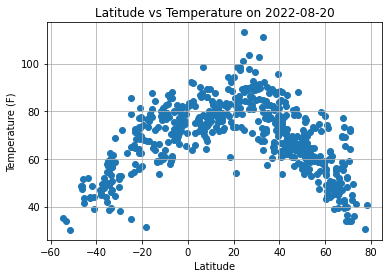

In [14]:
endRunDate = clean_city_data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = clean_city_data["Latitude"]
t = clean_city_data["Temperature"]
plt.scatter(x,t)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig(f'Latitude vs Temperature on {runDate}.png')
#display plot!
plt.show()

Latitude vs Temperature Scatter Plot Insights

The scatter plot maps cities' temperature against their latitude. Cities selected randomly. 
The arc of the scatter plotshows temperature increasing near the  northern hemisphere (Latitude 20) and dropping off further away. We can see that the temprature  in southern hemisphere are quite warm till -20 lattitude.


## Latitude vs. Humidity Plot

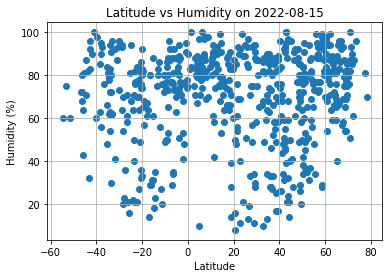

In [13]:
h = clean_city_data["Humidity"]
plt.scatter(x,h)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'Latitude vs Humidity on {runDate}.png')
plt.show()

Latitude vs Humidity Scatter Plot Insights

The scatter plot maps shows humidity against their latitude. Cities selected randomly.
The result reveals no particular correlation between humidity and latitude.

## Latitude vs. Cloudiness Plot

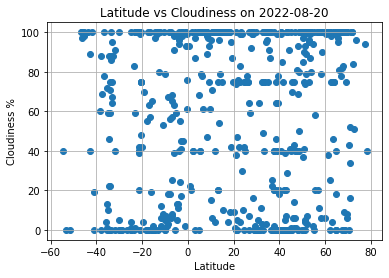

In [15]:
c = clean_city_data["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig(f'Latitude vs Cloudiness on {runDate}.png')
plt.show()

Latitude vs Cloudiness Scatter Plot Insights

The scatter plot maps cites cloudiness percent against their latitude. Cities selected randomly.
The result reveals no particular correlation between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

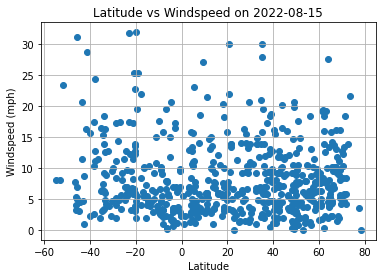

In [22]:
w_s = clean_city_data["Windspeed"]
plt.scatter(x,w_s)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'Latitude vs Windspeed on {runDate}.png')
plt.show()

In [ ]:
Latitude vs Wind Speed Scatter Plot Insights

The scatter plot maps cites cloudiness percent against their latitude. Cities selected randomly.
The result reveals no particular correlation between cloudiness and latitude.

## Linear Regression

In [23]:
# linearRegression

# x: first set of data
# y: second set of data
# x_coordinate: where the linear regression equasion appears on the plot x line
# y_coordinate: where the linear regression equasion appears on the plot y line
# label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x,y,x_coordinate,y_coordinate,label):
    (m, c, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * m + c
    eq = "y = " + str(round(m,2)) + "x + " + str(round(c,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(eq)
    plt.annotate(eq,(x_coordinate,y_coordinate),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{label}')
    plt.grid()

In [24]:
# Create Northern and Southern Hemisphere DataFrames
#pull loc above and below the equator; note any cities directly on the equator (i.e. latitude = 0) are excluded
Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]
Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.6522670784937807
y = -0.45x + 88.5


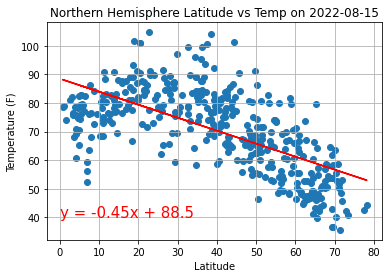

In [25]:
#set the data sets to compare
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.8118665465721835
y = 0.75x + 81.1


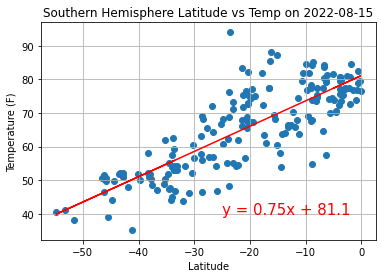

In [20]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Southern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

North/South Latitude vs Temprature Linear Regression Insights
The scatter plot maps Northern and Southern cities temperature vs latitude.

The result reveals a strong correlation between distance from the equator temperature. The closer to the equator, the higher the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is -0.0632087696976502
y = -0.07x + 71.76


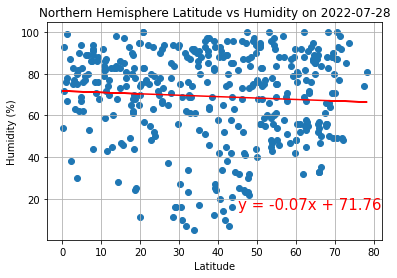

In [33]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Northern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is -0.12505506586939708
y = -0.21x + 64.23


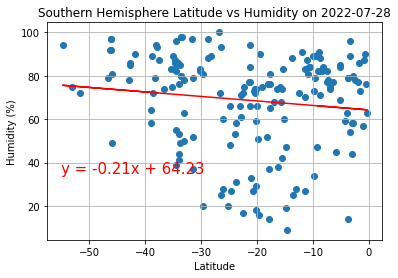

In [34]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Southern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

North/South Latitude vs Humidity Linear Regression Insights
The scatter plot maps Northern and Southern cities humidity vs latitude.

The result reveals no correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is -0.07634276642447813
y = -0.14x + 62.63


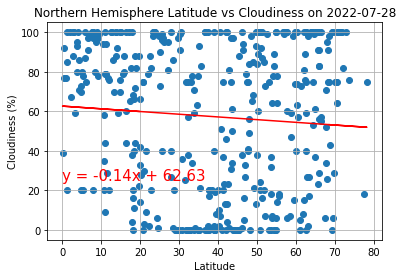

In [35]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.021039308136360953
y = 0.06x + 50.32


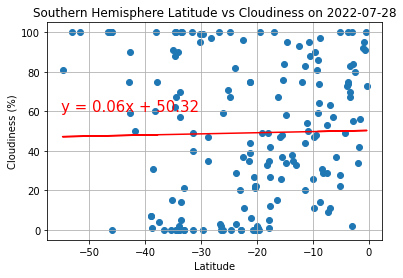

In [36]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

North/South Latitude vs Cloudiness Linear Regression Insights
The scatter plot maps Northern and Southern cities cloudiness vs latitude. Cities are randomly selected randomly.

The result reveals no correlation between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.0005220063336804159
y = 0.0x + 7.55


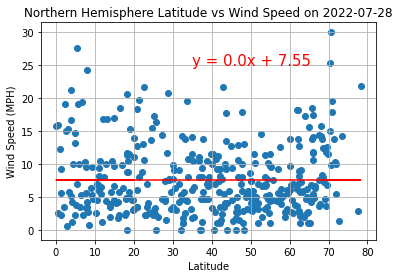

In [37]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.006602856896370683
y = 0.0x + 8.97


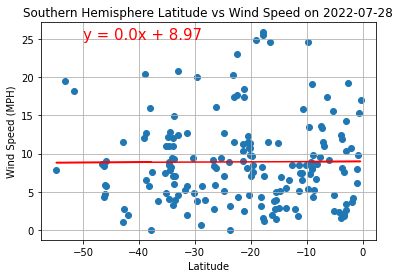

In [38]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

North/South Latitude vs Wind Speed Linear Regression Insights
The scatter plot maps Northern and Southern cities wind speed against their latitude. Cities are selected randomly.

The result reveals no correlation between latitude and wind speed.